In [1]:
import numpy as np
import os

import scipy
from scipy import ndimage as ndi

import skimage
from skimage import feature, color
from skimage import morphology
from skimage.morphology import watershed
from skimage.feature import peak_local_max, canny
from skimage.filters import roberts, sobel, scharr, prewitt, gabor


from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.image as mpimg

from random import shuffle

import cv2

import PIL

%matplotlib notebook

print('opencv version:', cv2.__version__)
print('skimage version:', skimage.__version__)

opencv version: 3.1.0
skimage version: 0.12.3


In [2]:

in_file = '/home/santosh/Downloads/VOCdevkit/VOC2008/PPMImages/2007_000515.ppm'
#p_file = '/home/santosh/Downloads/VOCdevkit/VOC2008/patches/s_1.25_k_700_m_1200/2007_000515.ppm'
p_file = '/home/santosh/Downloads/VOCdevkit/VOC2008/patches/s_0.5_k_500_m_50/2007_000515.ppm'

img = cv2.imread(in_file)
p_img = cv2.imread(p_file)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

pi = PIL.Image.open(p_file)
from collections import defaultdict
by_color = defaultdict(int)
for pixel in pi.getdata():
    by_color[pixel] += 1

print(len(by_color))
for k in by_color.items():
    print(k)
    break

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax0.axis('off')
ax1.imshow(cv2.cvtColor(p_img, cv2.COLOR_BGR2RGB)), ax1.axis('off')

print('n_patches:', len(ncol))
print('img:', img.shape)

258
((187, 96, 129), 219)


<IPython.core.display.Javascript object>

NameError: name 'ncol' is not defined

In [ ]:
print('HSV Historgram feature extraction :')
for col in ncol:
    print('values: ', col)
    patch_pixels = np.where(p_img == col[1])
    print('each patch pixels :', patch_pixels[0].shape)
    hsv_values = hsv_img[patch_pixels[0],patch_pixels[1], :]
    print('hsv values size ', hsv_values.shape)
    
    hs, _, _ = np.histogram2d(hsv_values[:, 0], hsv_values[:, 1], [10, 10])
    v, _ = np.histogram(hsv_values[:, 2], bins=10)
    print('hsb', hs.shape, v.shape)
    
    hist_fea = np.concatenate((hs.reshape(100,), v))
    print(hist_fea.shape)
    #print('Texture Historgram feature extraction :')
    #img2d = color.rgb2gray(hsv_img);#to convert patches from 3D to 2D
    #filt_real, filt_imag = gabor(img2d, frequency=0.6)
    #print('real filter value :', len(filt_real))
    #print('real filter images :', len(filt_imag))
    #wavelength = 4;
    #orientation = 90;
    #[mag,phase] = imgaborfilt(hsv_img,wavelength,orientation);
    #print('mag :', mag)
    #print('phase :', phase)
    
    break

(375, 500, 3) (375, 500)
kp, des: 1869 (1869, 128)


<IPython.core.display.Javascript object>


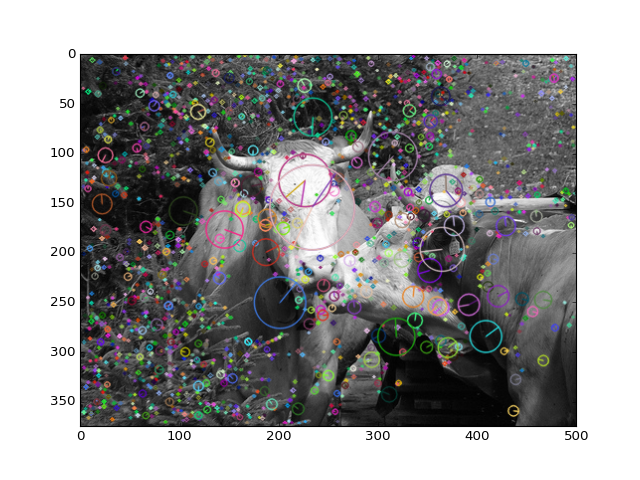

100.32102728731942
<class 'cv2.KeyPoint'>
0 (165.3177947998047, 2.279658317565918)


In [5]:
in_file = '/home/santosh/Downloads/VOCdevkit/VOC2008/in.ppm'
img = cv2.imread(in_file)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

print(img.shape, gray.shape)


sift = cv2.xfeatures2d.SIFT_create()

gr = gray[np.ogrid[:16, :16]]
kp, des = sift.detectAndCompute(gray, None)
print('kp, des:', len(kp), des.shape)

out_im = None
img_kp = cv2.drawKeypoints(gray, kp, out_im, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure()
plt.imshow(img_kp)
plt.show()


print(375 * 500 / len(kp))
for i, k in enumerate(kp):
    print(type(k))
    print(i, k.pt)
    break

#k = sift.detect(gr)
#k1, d = sift.compute(gr, k)

#print(k, k1, d.shape)

#sift = cv2.xfeatures2d.SIFT_create()
#kp, des = sift.detectAndCompute(gray,None)

In [ ]:
import numpy as np
import cv2
 
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 6):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 4.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters
 
def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
    np.maximum(accum, fimg, accum)
    return accum
  
img = cv2.imread(in_file)
filters = build_filters()
res1 = process(img, filters)

print(res1.shape, len(filters))